### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [6]:
data = pd.read_csv('data/coupons.csv')

In [7]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [9]:
#data.info()
#data.isnull().sum()
#Check the what is the value in non-null of car columns to see if its relevent
column_with_null_values= data.isnull().sum()
column_withmax_null_val = column_with_null_values.idxmax()
print(column_withmax_null_val)
#out of 12684 rows , cars has almost 12576 rows as null hence we should drop this column
#data.shape

car


3. Decide what to do about your missing data -- drop, replace, other...

Data Cleansing Step

In [12]:
#Lets drop the car column from the dataset as this doesnt have any relevant information
data = data.drop(columns=[column_withmax_null_val])

#Find unique values in bar, CoffeeHouse, CarryAway,RestaurantLessThan20,Restaurant20To50 columns 
unique_values_for_CoffeeHouse= data['CoffeeHouse'].unique()
unique_values_for_bar = data['Bar'].unique()
unique_values_for_CarryAway = data['CarryAway'].unique()
unique_values_for_RestaurantLessThan20 = data['RestaurantLessThan20'].unique()
unique_values_for_Restaurant20To50 = data['Restaurant20To50'].unique()
print( "unique_values_for_CoffeeHouse = ", unique_values_for_CoffeeHouse,"\n", "unique_values_for_bar = " , unique_values_for_bar ,
      "\n", "unique_values_for_CarryAway =" , unique_values_for_CarryAway, "\n", "unique_values_for_RestaurantLessThan20 = " , 
      unique_values_for_RestaurantLessThan20, "\n", "unique_values_for_Restaurant20To50= " , unique_values_for_Restaurant20To50)

#found - are never, less1, 1~3, 4~8, gt8
#lets apply label encoding to these categorical data to normalized the data, one-hot encoding can also be used .
# using never- 0, less1 = 1, 1~3 = 2, 4~8 = 3, gt8 = 4, and lets keep nan= -1
#0, less than 1, 1 to 3, 4 to 8 or greater than 8
standard_order = ['never', 'less1', '1~3', '4~8', 'gt8']

# Apply LabelEncoder to each column
for column in ['CoffeeHouse','Bar','CarryAway','RestaurantLessThan20','Restaurant20To50']:
    data[column] = data[column].map({k: i for i, k in enumerate(standard_order)})

#lets imputate data for the above columns which has value blank ( NaN) 

#Change age column from object to integer 
data['age']= data['age'].replace("below21", "20")
data['age'] = data['age'].replace("50plus", "51")
data['age'] = pd.to_numeric(data['age'], errors='coerce')

# Lets replace the value of Restaurant(<20) and Restaurant(20-50) for better readability and interpretation
#data['coupon'] = data['coupon'].replace({
    #'Restaurant(<20)': '', 
    #'Restaurant(20-50)': ''
#})

# we can also drop the columns - toCoupon_GEQ5min, toCoupon_GEQ10min, toCoupon_GEQ15min, toCoupon_GEQ25min as those might not be needed 

# Less than $12500=0 , $12500 - $24999 - 1 , $25000 - $37499- 2, $37500 - $49999 -3 , $50000 - $62499 -4 , $62500 - $74999-5 , $75000 - $87499-6, $87500 - $99999-7,$100000 or More-8

standard_income_order = ['Less than $12500','$12500 - $24999', '$25000 - $37499',
'$37500 - $49999',  
'$50000 - $62499',
'$62500 - $74999',
'$75000 - $87499',
'$87500 - $99999',
'$100000 or More']

# Apply LabelEncoder to each column
for column in ['income']:
    data['income_numeric'] = data[column].map({k: i for i, k in enumerate(standard_income_order)})
data.head(2) 

unique_values_for_CoffeeHouse =  ['never' 'less1' '4~8' '1~3' 'gt8' nan] 
 unique_values_for_bar =  ['never' 'less1' '1~3' 'gt8' nan '4~8'] 
 unique_values_for_CarryAway = [nan '4~8' '1~3' 'gt8' 'less1' 'never'] 
 unique_values_for_RestaurantLessThan20 =  ['4~8' '1~3' 'less1' 'gt8' nan 'never'] 
 unique_values_for_Restaurant20To50=  ['1~3' 'less1' 'never' 'gt8' '4~8' nan]


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,income_numeric
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,NaN,3.0,2.0,1,0,0,0,1,1,3
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,NaN,3.0,2.0,1,0,0,0,1,0,3


In [13]:
#Running some test queries
bar_dd = data.query('coupon == "Bar"') 

bar_freq_for_driver_age_25_up = bar_dd.query('age > 25 & Bar > 1 ')['Bar'].count()
print(bar_freq_for_driver_age_25_up)
#bar_freq_for_driver_age_25_below = bar_dd.query('age < 25 & Bar > 1 ')['Bar'].count()

420


4. What proportion of the total observations chose to accept the coupon?



In [15]:
# proportion of coupon accepted
Tot_num_drivers_accepted_coupons= data.query('Y == 1')['Y'].count()
Total_coupons = data['Y'].count()

# Calculate the proportion
prop_of_accepted_coupon = Tot_num_drivers_accepted_coupons / Total_coupons

print("Proportion of accepted coupon:", prop_of_accepted_coupon)

Proportion of accepted coupon: 0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

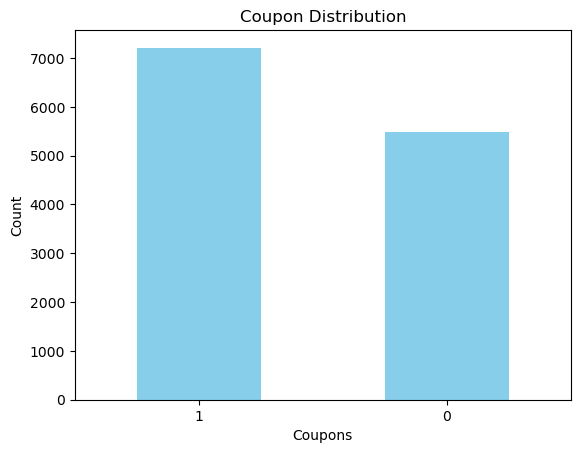

In [17]:
#bar plot for Coupon acceptance
plt.figure()
bar = data['Y'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Coupon Distribution')
plt.xlabel('Coupons')
plt.ylabel('Count')
plt.xticks(rotation=360)
plt.show()
bar.figure.savefig('images/coupon_barchart.png')

6. Use a histogram to visualize the temperature column.

<Figure size 640x480 with 0 Axes>

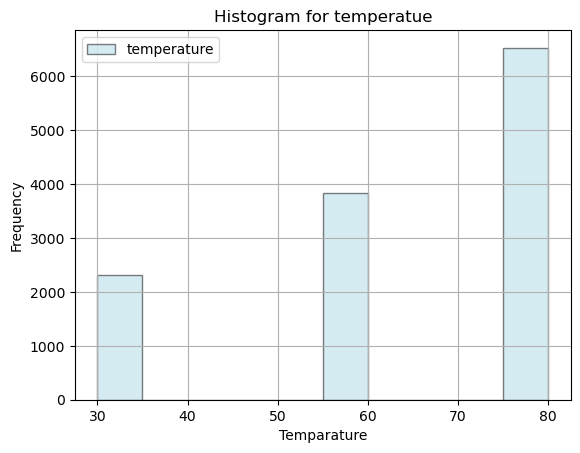

In [19]:
plt.figure()
hist3= data.plot.hist(y='temperature', bins=10, edgecolor='black', alpha=0.5, color='lightblue', grid=True)
plt.title('Histogram for temperatue')
plt.xlabel('Temparature')
hist3.figure.savefig('images/temp_hist.png')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [21]:
bar_df = data.query('coupon == "Bar"') 

2. What proportion of bar coupons were accepted?


In [23]:
# Proportion of bar coupon accepted
Tot_num_bar_accepted_coupon= bar_df[(bar_df['Y'] == 1)]['Y'].count()
Tot_num_bar_coupon = bar_df['Y'].count()

# Calculate the proportion
bar_proportion = Tot_num_bar_accepted_coupon / Tot_num_bar_coupon

print("Proportion of bar coupon accepted", bar_proportion)

Proportion of bar coupon accepted 0.41001487357461575


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [25]:
# Acceptance rate between 1~3 times bar visits to more than 3
to_bar_less_than_3_times = bar_df.query('Bar <=2')
to_bar_more_than_3_times = bar_df.query('Bar > 2')
acceptance_rate_3_or_fewer = to_bar_less_than_3_times['Y'].mean()
acceptance_rate_more_than_3 = to_bar_more_than_3_times['Y'].mean()
print( "Acceptance rate for those who went to bar 3 or less is", acceptance_rate_3_or_fewer, "vs acceptance rate for those who went more is", acceptance_rate_more_than_3)


Acceptance rate for those who went to bar 3 or less is 0.37061769616026713 vs acceptance rate for those who went more is 0.7688442211055276


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [27]:
#acceptance rate for driver over 25 with frequency > 1 to others

# Drivers who go to bars more than once and are older than 25
bar_freq_for_driver_age_25_up = bar_df.query('age > 25 & Bar > 1')
acc_rate_for_driver_age_25_up = bar_freq_for_driver_age_25_up['Y'].mean()

# All others
bar_freq_for_driver_age_25_below = bar_df.query('( Bar <= 1 | age <= 25 )')
acc_rate_for_driver_age_25_below = bar_freq_for_driver_age_25_below['Y'].mean()

print( "acc_rate_for_driver_age_25_up =" , acc_rate_for_driver_age_25_up," acc_rate_for_driver_age_25_below=", acc_rate_for_driver_age_25_below)
diff_acceptance_rate = acc_rate_for_driver_age_25_up - acc_rate_for_driver_age_25_below
print("Difference in acceptance rate", diff_acceptance_rate)
if diff_acceptance_rate != 0 :
    print( "There is difference of", diff_acceptance_rate)
else : 
    print("No difference")

acc_rate_for_driver_age_25_up = 0.6952380952380952  acc_rate_for_driver_age_25_below= 0.33417882054533926
Difference in acceptance rate 0.36105927469275595
There is difference of 0.36105927469275595


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [29]:
#driver with passenger that were not kids and occupations other than farming fishing or forestry with frequency > 1 
driver_meeting_criteria = bar_df.query('Bar > 1 & passanger != "Kid(s)" & occupation != "Farming Fishing & Forestry"')
acc_rate_for_defined_criteria = driver_meeting_criteria['Y'].mean()

all_driver = bar_df.query('Bar <= 1 | passanger == "Kid(s)" | occupation == "Farming Fishing & Forestry"')
                                       
acc_rate_for_all_driver = all_driver['Y'].mean()
                       
print( "acc_rate_for_defined_driver = " , acc_rate_for_defined_criteria, " ; ","acc_rate_for_all_driver = ",acc_rate_for_all_driver)
diff_accept_rate = acc_rate_for_defined_criteria - acc_rate_for_all_driver
                
if diff_accept_rate != 0 :
    print( "There is difference of", diff_accept_rate)
else : 
    print("No difference")

acc_rate_for_defined_driver =  0.7132486388384754  ;  acc_rate_for_all_driver =  0.2948895027624309
There is difference of 0.4183591360760445


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



acceptance_rate_criteria_1 =  0.7132486388384754
acceptance_rate_criteria_2 =  0.7217391304347827
acceptance_rate_criteria_3 =  0.7108910891089109
     Criteria  Acceptance Rate
0  Criteria 1         0.713249
1  Criteria 2         0.721739
2  Criteria 3         0.710891


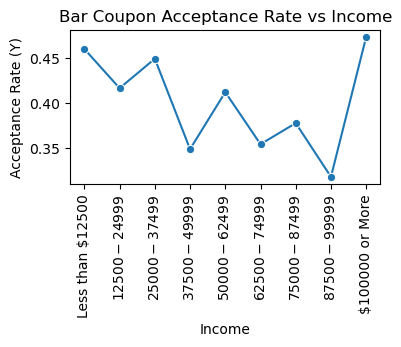

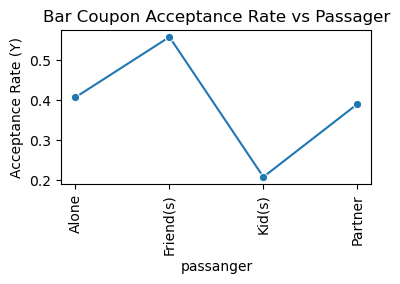

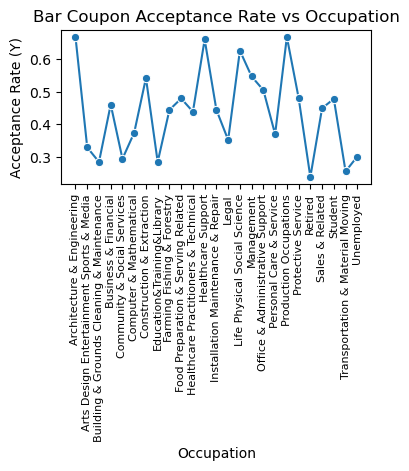

In [31]:
#go to bars more than once a month, had passengers that were not a kid, and were not widowed 
driver_for_criteria_1 = bar_df.query('Bar > 1 & passanger != "Kid(s)" & maritalStatus != "Widowed"')
acceptance_rate_criteria_1 = driver_for_criteria_1['Y'].mean()
print('acceptance_rate_criteria_1 = ', acceptance_rate_criteria_1)

#go to bars more than once a month and are under the age of 30 
driver_for_criteria_2 = bar_df.query('age < 30 & Bar > 1')
acceptance_rate_criteria_2 = driver_for_criteria_2['Y'].mean()
print('acceptance_rate_criteria_2 = ', acceptance_rate_criteria_2)

#go to cheap restaurants more than 4 times a month and income is less than 50K
list_of_income = ["$37500 - $49999","$25000 - $37499", "$12500 - $24999", "Less than $12500"]

driver_for_criteria_3 = data.query('coupon == "Restaurant(<20)" & income in @list_of_income & RestaurantLessThan20 >= 3')
acceptance_rate_criteria_3= driver_for_criteria_3['Y'].mean()
print('acceptance_rate_criteria_3 = ', acceptance_rate_criteria_3)

acceptance_rates_for_all = pd.DataFrame({
    'Criteria': ['Criteria 1', 'Criteria 2', 'Criteria 3'],
    'Acceptance Rate': [acceptance_rate_criteria_1, acceptance_rate_criteria_2, acceptance_rate_criteria_3]
})

print(acceptance_rates_for_all)

## Lets do the plotting of line graph between income and acceptance Y==1
# Group the data by income and calculate the acceptance rate for bar coupon

income_mapping = {
    0:'Less than $12500',
    1:'$12500 - $24999', 
    2:'$25000 - $37499',
    3:'$37500 - $49999',  
    4:'$50000 - $62499',
    5:'$62500 - $74999',
    6:'$75000 - $87499',
    7:'$87500 - $99999',
    8:'$100000 or More'
}

income_acceptance_rate = bar_df.groupby('income_numeric')['Y'].mean().reset_index()
income_acceptance_rate['income']= income_acceptance_rate['income_numeric'].replace(income_mapping)

# Create a line plot
plt.figure(figsize=(4, 2))
sns.lineplot(data=income_acceptance_rate, x='income', y='Y', marker='o')

# Customize the plot
plt.xlabel('Income')
plt.ylabel('Acceptance Rate (Y)')
plt.title('Bar Coupon Acceptance Rate vs Income')
plt.xticks(rotation=90)
plt.savefig('images/bar_accpt_rate_vs_income.png')

#Line graph for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed 
# Create a line plot
passanger_acceptance_rate = bar_df.groupby('passanger')['Y'].mean().reset_index()
plt.figure(figsize=(4, 2))
sns.lineplot(data=passanger_acceptance_rate, x='passanger', y='Y', marker='o')

# Customize the plot
plt.xlabel('passanger')
plt.ylabel('Acceptance Rate (Y)')
plt.title('Bar Coupon Acceptance Rate vs Passager')
plt.xticks(rotation=90)
plt.savefig('images/bar_accpt_rate_vs_Passager.png')
plt.show()

#line graph for occupations  
occupation_acceptance_rate = bar_df.groupby('occupation')['Y'].mean().reset_index()
plt.figure(figsize=(4, 2))
sns.lineplot(data=occupation_acceptance_rate, x='occupation', y='Y', marker='o')

# Customize the plot
plt.xlabel('Occupation')
plt.xticks(fontsize=8)
plt.ylabel('Acceptance Rate (Y)')
plt.title('Bar Coupon Acceptance Rate vs Occupation')
plt.xticks(rotation=90)
plt.savefig('images/bar_accpt_rate_vs_occupation.png')
plt.show()


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [33]:
#The observation based on the above data, my hypothesis is that driver 

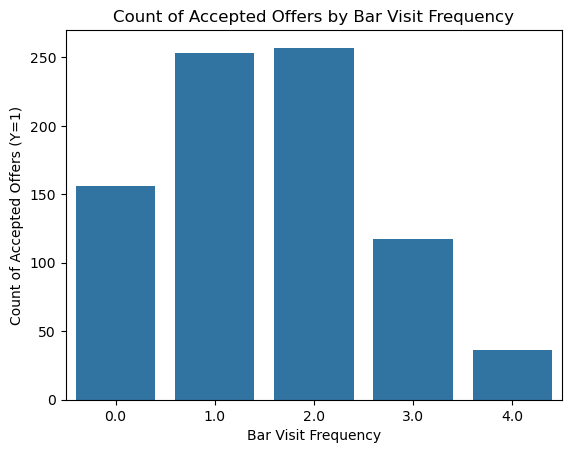

In [34]:
## To confirm the hypothesis based of single and multi-variant plots

#Single variable analysis
#driver visit frequency to bar vs acceptance of offer
plt.figure()

# Calculate the count Y==1 for all the bar category
accepted_count_by_bar = bar_df[(bar_df['Y'] == 1)].groupby('Bar').size()

# Reset the index and name the count column
accepted_count_by_bar = accepted_count_by_bar.reset_index(name='Count')

# Create a bar plot showing the count of Y=1 for each Bar category
sns.barplot(x='Bar', y='Count', data=accepted_count_by_bar)
# Add labels and title
plt.xlabel('Bar Visit Frequency')
plt.ylabel('Count of Accepted Offers (Y=1)')
plt.title('Count of Accepted Offers by Bar Visit Frequency')

plt.savefig('images/barplot_barvisits_vs_offer_accept_cnt.png')


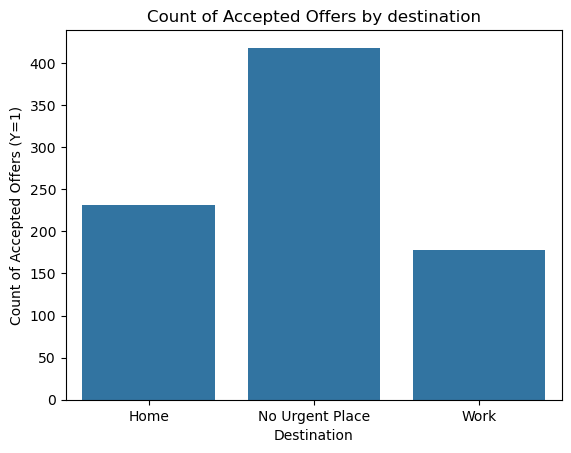

In [35]:
### Does the driver going to no urgent place accepts the offer more often

accepted_count_by_destination = bar_df[(bar_df['Y'] == 1)].groupby('destination').size()
accepted_count_by_destination = accepted_count_by_destination.reset_index(name='Count')
sns.barplot(x='destination', y='Count', data=accepted_count_by_destination)
# Add labels and title
plt.xlabel('Destination')
plt.ylabel('Count of Accepted Offers (Y=1)')
plt.title('Count of Accepted Offers by destination')

plt.savefig('images/barplot_destination_vs_offer_accept_cnt.png')

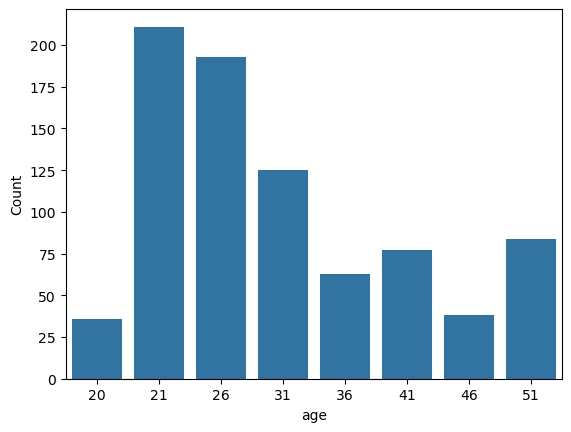

<Figure size 800x400 with 0 Axes>

In [94]:
### Does the driver with older age accepts the offer more than younger age

accepted_count_by_age = bar_df[(bar_df['Y'] == 1)].groupby('age').size()
accepted_count_by_age = accepted_count_by_age.reset_index(name='Count')
sns.barplot(x='age', y='Count', data=accepted_count_by_age)
# Add labels and title
plt.xlabel('age')
plt.figure(figsize=(8, 4))

plt.savefig('images/barplot_age_vs_offer_accept_cnt.png')


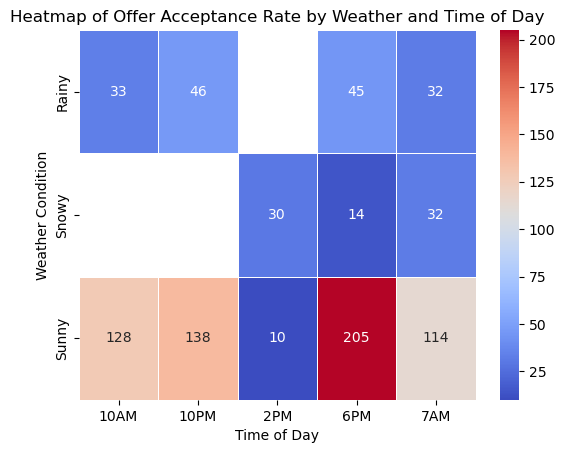

<Figure size 1200x600 with 0 Axes>

In [37]:
##Lets plot multi-variant plots

#lets explore how the weather and time variables affects the bar coupon acceptance. We do this by heatmap
#group by weather and time the rows that have accepted offers
accepted_coupon_size = bar_df[bar_df['Y'] == 1].groupby(['weather','time']).size()
accepted_coupon_size = accepted_coupon_size.reset_index(name='Count')

#Create the heatmap data
heatmap_data = accepted_coupon_size.pivot(index='weather', columns='time', values='Count')

#Create heatmap using sns
sns.heatmap(heatmap_data, fmt='.0f', annot=True, cmap='coolwarm', cbar=True, linewidths=.5)

# Add labels and title
plt.title('Heatmap of Offer Acceptance Rate by Weather and Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Weather Condition')
plt.figure(figsize=(12, 6))

plt.savefig('images/heatmap_offer_accpt_weatherandtime.png')

#Based on these observations, what do you hypothesize about drivers who accepted the bar coupons

### Based on the acceptance rate that we have calculated and visualization, there is clear difference in acceptance rate based on customer characteristics and behaviors ###

1. **Customer age**
      The customers who accepted the coupons were older, more than a 50% were age 25 or above. On the opposite end of the acceptance spectrum, young consumers ages 18 to 24 evinced low acceptance rate
2. **Frequency of Bar Visits**
    Interestingly, there was a major difference in how often customers went to bars. Coupon acceptance was significantly higher for customers who had visited a bar more than once in the previous month (76%) than among those who rarely or never went to one (37%)
3. **Passenger Profile** 
    Adult passengers (i.e. non-kids) coupon had higher acceptance rate for bar coupon, while child passengers had an acceptance rate of only 29%. This indicates that the passenger mix could impact coupon acceptance.
4. **Occupation** 
    Driver with occupations that were non-farming, fishing or forestry were more likely to use the bar coupons. Below graphs shows, occupation like architecture & engineering, healthcare support and production occupation has highest acceptance rate. Whereas occupation as retired has no acceptance rate. Hence targeting specific occupation demographic can increase chances of coupon acceptance
5. **Income Levels**
    Driver with low income below $50K as well as very high income above 100K are more likely to use a bar coupon than others. This shows that income level has crucial role in coupon acceptance behavior. We can do further analysis on this to
6. **Weather and Timing**
    Consequently, coupon acceptance rates peaked during sunny weather and after 6 PM — which showcases that external factor plays a role in coupon acceptance rate.
7. **Destination Urgency**
    When the destination of customers was non-urgent place, the probability to accepted the bar coupon is comparative higher 


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

#Investigating the Coffee House Coupon

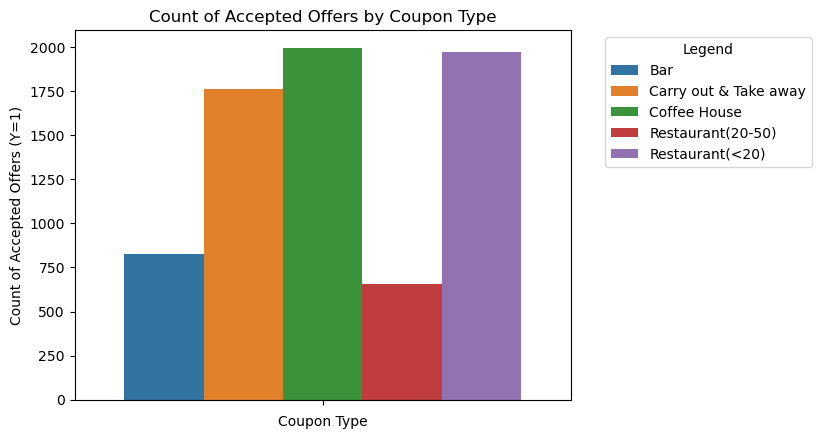

In [41]:
#Bar plotting to distribute accepted coupon between type of coupon
accepted_count_by_coupon_type = data[(data['Y'] == 1)].groupby('coupon').size()
accepted_count_by_coupon_type = accepted_count_by_coupon_type.reset_index(name='Count')
sns.barplot(y="Count", hue='coupon', data=accepted_count_by_coupon_type)
# Add labels and title
plt.xlabel('Coupon Type')
plt.ylabel('Count of Accepted Offers (Y=1)')
plt.legend(title="Legend", bbox_to_anchor=(1.5, 1), loc='upper right')
plt.title('Count of Accepted Offers by Coupon Type')
plt.xticks(rotation=45)
plt.savefig('images/barplot_coupontype_vs_offer_accept_cnt.png')

In [42]:
#Create a new DataFrame that contains just the Coffee House

coffeehouse_df = data[(data['coupon'] == "Coffee House")]

#lets format some of the columns in this dataframe


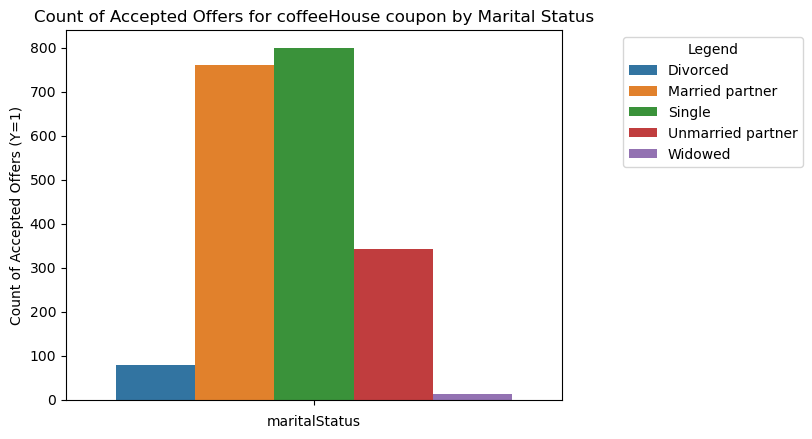

In [43]:
# Lets do the bar plot for maritalStatus and coffeecoffee house 
# Create bar plot
accepted_count_by_maritalstatus = coffeehouse_df[(coffeehouse_df['Y'] == 1)].groupby('maritalStatus').size()
accepted_count_by_martialstatus = accepted_count_by_maritalstatus.reset_index(name='Count')
sns.barplot(y="Count", hue='maritalStatus', data=accepted_count_by_martialstatus)
# Add labels and title
plt.xlabel('maritalStatus')
plt.ylabel('Count of Accepted Offers (Y=1)')
plt.legend(title="Legend", bbox_to_anchor=(1.5, 1), loc='upper right')
plt.title('Count of Accepted Offers for coffeeHouse coupon by Marital Status')
plt.xticks(rotation=45)
plt.savefig('images/barplot_martialstatus_vs_offer_accept_cnt.png')

Acceptance rate with age >=21 :  0.4912783129393387 
 Acceptance rate with age < 21 : 0.6967741935483871


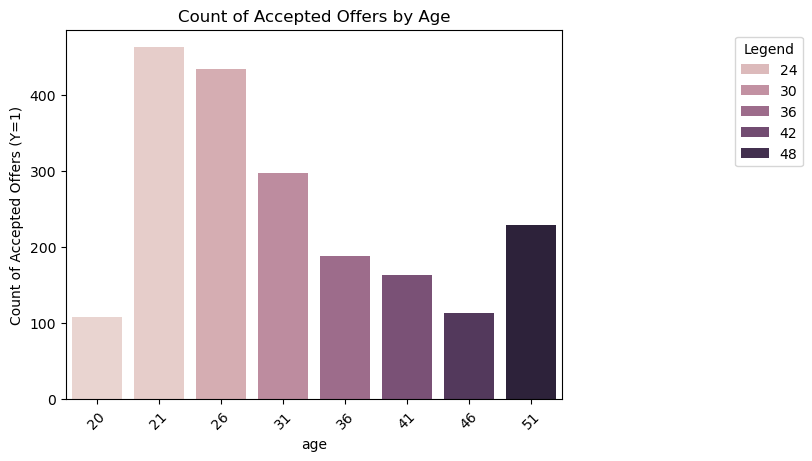

In [44]:
# Lets do the bar plot for age and coffeecoffee house 
# Create bar plot
accepted_count_by_age_ch = coffeehouse_df[(coffeehouse_df['Y'] == 1)].groupby('age').size()
accepted_count_by_age_ch = accepted_count_by_age_ch.reset_index(name='Count')
sns.barplot(x='age', y="Count", hue='age', data=accepted_count_by_age_ch)
# Add labels and title
plt.xlabel('age')
plt.ylabel('Count of Accepted Offers (Y=1)')
plt.legend(title="Legend", bbox_to_anchor=(1.5, 1), loc='upper right')
plt.title('Count of Accepted Offers by Age')
plt.xticks(rotation=45)
plt.savefig('images/barplot_age_vs_choffer_accept_cnt.png')

to_coffeeHouse_with_age_gtr_21 = coffeehouse_df.query('age >=21 ')
to_coffeehouse_with_age_less_21 = coffeehouse_df.query('age < 21')
ch_acceptance_rate_with_age_gtr_21 = to_coffeeHouse_with_age_gtr_21['Y'].mean()
ch_acceptance_rate_with_age_less_21 = to_coffeehouse_with_age_less_21['Y'].mean()
print( "Acceptance rate with age >=21 : ", ch_acceptance_rate_with_age_gtr_21, "\n", "Acceptance rate with age < 21 :", ch_acceptance_rate_with_age_less_21)

In [45]:
## Acceptance rate between 1~3 times CoffeeHouse visits to more than 3
to_coffeeHouse_less_than_3_times = coffeehouse_df.query('CoffeeHouse <=2')
to_coffeehouse_more_than_3_times = coffeehouse_df.query('CoffeeHouse > 2')
ch_acceptance_rate_3_or_fewer = to_coffeeHouse_less_than_3_times['Y'].mean()
ch_acceptance_rate_more_than_3 = to_coffeehouse_more_than_3_times['Y'].mean()
print( "Acceptance rate for those who went to CoffeeHouse 3 or less is", ch_acceptance_rate_3_or_fewer, "vs acceptance rate for those who went more is", ch_acceptance_rate_more_than_3)


Acceptance rate for those who went to CoffeeHouse 3 or less is 0.44940867279894875 vs acceptance rate for those who went more is 0.675


   CoffeeHouse  Count
0          0.0    175
1          1.0    518
2          2.0    675
3          3.0    369
4          4.0    225


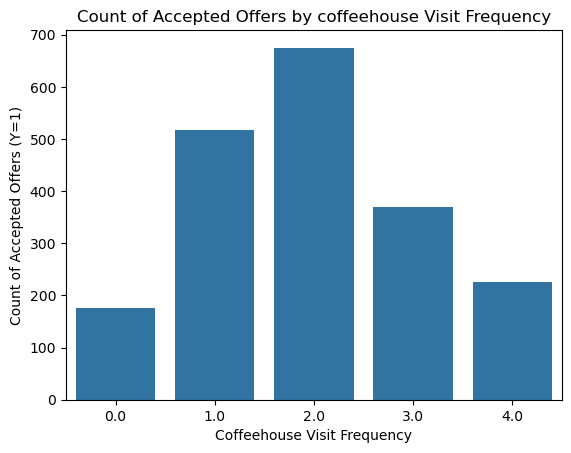

In [106]:
#driver visit frequency to coffeehouse(ch) vs acceptance of offer
plt.figure()

# Calculate the count Y==1 for all the ch category
accepted_count_by_ch = coffeehouse_df[(coffeehouse_df['Y'] == 1)].groupby('CoffeeHouse').size()

# Reset the index and name the count column
accepted_count_by_ch = accepted_count_by_ch.reset_index(name='Count')
print(accepted_count_by_ch)
# Create a bar plot showing the count of Y=1 for each Bar category
sns.barplot(x='CoffeeHouse', y='Count', data=accepted_count_by_ch)
# Add labels and title
plt.xlabel('Coffeehouse Visit Frequency')
plt.ylabel('Count of Accepted Offers (Y=1)')
plt.title('Count of Accepted Offers by coffeehouse Visit Frequency')

plt.savefig('images/barplot_chvisits_vs_offer_accept_cnt.png')

In [46]:
coffeehouse_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3996 entries, 1 to 12681
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination           3996 non-null   object 
 1   passanger             3996 non-null   object 
 2   weather               3996 non-null   object 
 3   temperature           3996 non-null   int64  
 4   time                  3996 non-null   object 
 5   coupon                3996 non-null   object 
 6   expiration            3996 non-null   object 
 7   gender                3996 non-null   object 
 8   age                   3996 non-null   int64  
 9   maritalStatus         3996 non-null   object 
 10  has_children          3996 non-null   int64  
 11  education             3996 non-null   object 
 12  occupation            3996 non-null   object 
 13  income                3996 non-null   object 
 14  Bar                   3959 non-null   float64
 15  CoffeeHouse           392

In [47]:
#Compare the acceptance rate between drivers who go to a CoffeeHouse (CH) more than once a month and are Married Partner to the all others. 

# Drivers who go to CoffeeHouse more than once and are married
ch_freq_for_driver_married = coffeehouse_df.query('maritalStatus == "Married partner" & CoffeeHouse > 1')
accp_rate_for_driver_married = ch_freq_for_driver_married['Y'].mean()

# All others
ch_freq_for_driver_allothers = coffeehouse_df.query('maritalStatus != "Married partner" | CoffeeHouse < 1')
accp_rate_for_driver_allothers = ch_freq_for_driver_allothers['Y'].mean()

print( "accp_rate_for_driver_married =" , accp_rate_for_driver_married," accp_rate_for_driver_allothers=", accp_rate_for_driver_allothers)
diff_acceptance_rate_drivers = accp_rate_for_driver_married - accp_rate_for_driver_allothers
print("Difference in acceptance rate", diff_acceptance_rate_drivers)
if diff_acceptance_rate != 0 :
    print( "There is difference of", diff_acceptance_rate_drivers)
else : 
    print("No difference")

accp_rate_for_driver_married = 0.6600284495021337  accp_rate_for_driver_allothers= 0.46006389776357826
Difference in acceptance rate 0.19996455173855543
There is difference of 0.19996455173855543


In [48]:
## Acceptance rate between gender - Male and female
to_coffeeHouse_gender_male = coffeehouse_df.query('gender == "Male"')
to_coffeehouse_gender_female = coffeehouse_df.query('gender == "Female"')
ch_acceptance_for_male = to_coffeeHouse_gender_male['Y'].mean()
ch_acceptance_for_female= to_coffeehouse_gender_female['Y'].mean()
print( "Acceptance rate for male for coffeehouse coupons", ch_acceptance_for_male, "vs Acceptance rate for female for coffeehouse coupons", ch_acceptance_for_female)


Acceptance rate for male for coffeehouse coupons 0.506426735218509 vs Acceptance rate for female for coffeehouse coupons 0.492442710872745


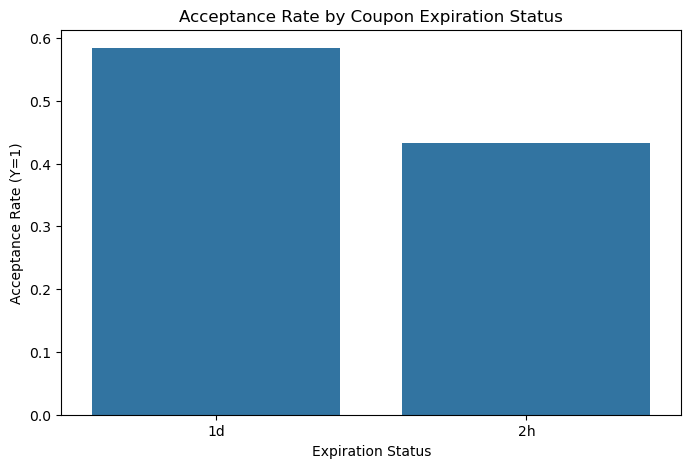

In [49]:
# Create a new DataFrame to count the acceptance rates
expiration_counts = coffeehouse_df.groupby('expiration')['Y'].mean().reset_index()

# Rename the columns for clarity
expiration_counts.columns = ['Expiration', 'Acceptance_Rate']

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(data=expiration_counts, x='Expiration', y='Acceptance_Rate')
plt.title('Acceptance Rate by Coupon Expiration Status')
plt.ylabel('Acceptance Rate (Y=1)')
plt.xlabel('Expiration Status')
plt.show()


In [50]:
#Compare the acceptance rate between drivers who are single and below 30

ch_freq_for_driver_single_30_below = coffeehouse_df.query('maritalStatus == "Single" & age < 30 ')
accp_rate_for_driver_single_below_30 = ch_freq_for_driver_single_30_below['Y'].mean()
# For all other who doesnt fit above criteria 
ch_freq_for_driver_allothers_2 = coffeehouse_df.query('maritalStatus != "Single" | age < 30')
accp_rate_for_driver_allothers_2 = ch_freq_for_driver_allothers_2['Y'].mean()

print( "accp_rate_for_driver_single_below_30 =" , accp_rate_for_driver_single_below_30," accp_rate_for_driver_allothers_2=", accp_rate_for_driver_allothers_2)
diff_accept_rate_drivers_single = accp_rate_for_driver_single_below_30 - accp_rate_for_driver_allothers_2
print("Difference in acceptance rate", diff_accept_rate_drivers_single)
if diff_accept_rate_drivers_single != 0 :
    print( "There is difference of", diff_accept_rate_drivers_single)
else : 
    print("No difference")

accp_rate_for_driver_single_below_30 = 0.5385375494071146  accp_rate_for_driver_allothers_2= 0.503181029496819
Difference in acceptance rate 0.03535651991029565
There is difference of 0.03535651991029565


In [51]:
#Acceptance rate for the Driver whose age is greater than 25 using coupon with expiration in 2hours vs others

driver25above_expiry_2hr = coffeehouse_df.query('expiration == "1d" & age > 25 ')
accep_rate_driver25above_expiry_2hr = driver25above_expiry_2hr['Y'].mean()

all_others = coffeehouse_df.query('~(expiration == "1d" & age > 25)')
accep_rate_all_others = all_others['Y'].mean()

print("\accep_rate_driver25above_expiry_2hr: ",accep_rate_driver25above_expiry_2hr,
      "\all_others: ",accep_rate_all_others)

ccep_rate_driver25above_expiry_2hr:  0.5598484848484848 ll_others:  0.4693572496263079


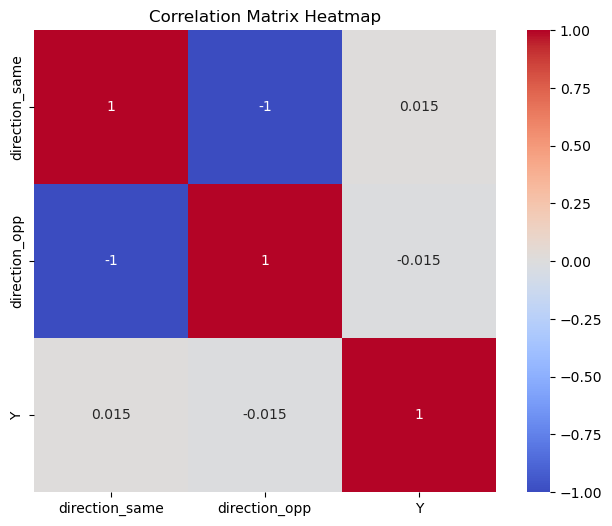

In [52]:
# Calculate the correlation matrix
correlation_df = data[['direction_same', 'direction_opp', 'Y']]
correlation_matrix = correlation_df.corr()

# Set the size of the plot
plt.figure(figsize=(8, 6))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)

# Titles and labels
plt.title('Correlation Matrix Heatmap')
plt.show()

### Based on the acceptance rate that we have calculated and visualization, there is clear difference in acceptance rate based on customer characteristics and behaviors ###

1. **Driver age**
   The Driver who accepted the coupons were older, more than a 60% were age 25 or above. On the opposite end of the acceptance spectrum, young consumers ages 18 to 24 evinced low acceptance rate

2. **Marital Status**
   Driver who are single and married with partners have more chances to accept the coffeehouse coupon then other especially widowed are very less likely to accept the coupon

3. **Frequency visit**
   Driver who visits coffeehouse more than 1 times are more likely to accept the coupons than who never visits

4. **Coupon Expiration**
   Acceptance of coupon with 1 day expiration is higher then 2hour expiration Driver with age greater than 25 are likely to accept coupons which are with expiration of 1 day then others